**Colab 1: Visualizing MLPs**

We're going to get our feet wet with tensorflow by messing around with multi-layer perceptrons, the simplest networks you can construct.  The input and output will stay low-dimensional so that we can visualize what's going on.  

**Try tweaking all parts of the code and google anything that looks unfamiliar!**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

tfkl = tf.keras.layers

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Spawning a baby network

In [ ]:
# Let's make a super simple MLP that takes as input a single number and outputs a single number
# Keras is a part of tensorflow that allows high level creation, manipulation, etc of networks.
# We create a model by stacking layers, and we'll use only 2 types of layers for this colab: Input and Dense. 
# Check out the myriad other layers that have been defined: https://www.tensorflow.org/api_docs/python/tf/keras/layers

input_dimension = 1
output_dimension = 1

layers = [tfkl.Input(input_dimension)]
layers.append(tfkl.Dense(5, activation='relu'))
layers.append(tfkl.Dense(output_dimension, activation='linear'))

model = tf.keras.Sequential(layers)

# We now have a simple MLP; let's inspect it
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# The model is parameterized by its weights, which keras stores as a list of tensors
# What are the four elements of this list?  
# Try changing the size of the network to change the size of these weights, to make sure you have pinned down what's what
print(model.get_weights())

[array([[ 0.07717562,  0.15733957, -0.42583275, -0.25559616,  0.27670312]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[-0.9374335 ],
       [ 0.8013706 ],
       [ 0.4043758 ],
       [-0.4617524 ],
       [-0.00799847]], dtype=float32), array([0.], dtype=float32)]


In [ ]:
# To pass values through the network, we can call the model with the input directly

input_val = 1.23456

# One thing that can be tricky at first is getting the tensor shapes correct
# An outermost batch dimension is required, so that the input will be shape [batch_size, input_dimension]
# This batch dimension can be different every time you run a tensor through the network, it just has to be there
input_val = np.reshape(input_val, [1, 1])

output_val = model(input_val)
print(output_val)

tf.Tensor([[0.0636133]], shape=(1, 1), dtype=float32)


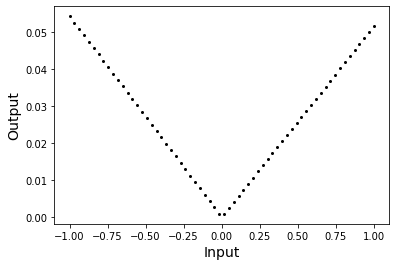

In [ ]:
# The batch dimension allows us to input arbitrarily many values at once
num_pts = 64
input_vals = np.linspace(-1, 1, num_pts).reshape([-1, 1])
output_vals = model(input_vals)
# Now we can display visually, as f(x)
plt.figure(figsize=(6, 4))
plt.plot(input_vals, output_vals, 'ko', markersize=2)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.show()

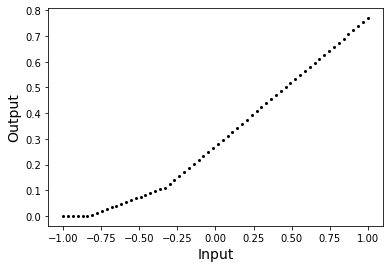

In [ ]:
# Pretty boring output, due primarily to the default weight initialization
# The default is to start with all the bias values equal to zero, which (esp for the 1D input) makes all the ReLU activations about the same
# To change that and get a more interesting random instantiation, we sample the bias values from a normal distribution
layers = [tfkl.Input(input_dimension)]
layers.append(tfkl.Dense(5, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=1)))
layers.append(tfkl.Dense(output_dimension, activation='linear'))

model = tf.keras.Sequential(layers)

output_vals = model(input_vals)
# Now we can display visually, as f(x)
plt.figure(figsize=(6, 4))
plt.plot(input_vals, output_vals, 'ko', markersize=2)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.show()

## Still not much to look at, but this network is tiny.  We'll bulk it up next

# How much brainpower do you need to connect a couple dots?

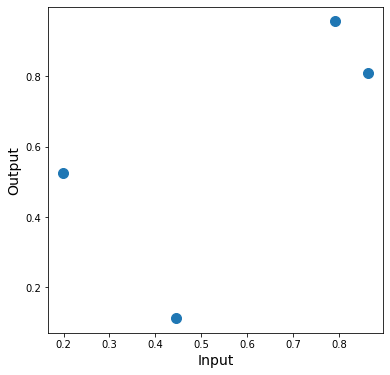

In [ ]:
# Let's say we have a couple input-output pairs we want to fit
num_samples = 4
samples = np.random.uniform(size=(num_samples, 2))
plt.figure(figsize=(6, 6))
plt.scatter(samples[:, 0], samples[:, 1], s=100)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.show()

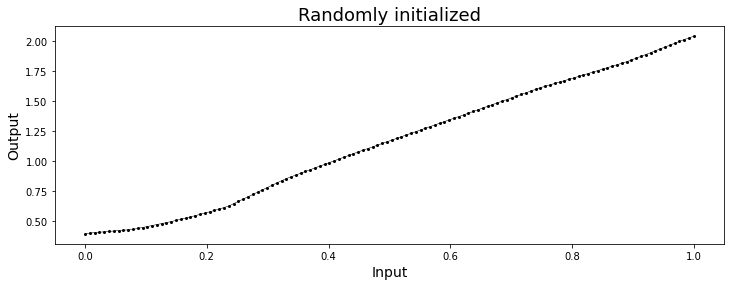

In [ ]:
# Let's train a network to fit these.  First make the model:

input_dimension = 1
output_dimension = 1
hidden_layer_sizes = [64, 64]
hidden_activation = 'relu'
kernel_std = bias_std = 0.5

layers = [tfkl.Input(input_dimension)]
for hidden_dimension in hidden_layer_sizes:
  # Similar to redefinining the bias initializer, we'll make one for the kernel 
  # weights to get a bigger spread in their values than what's set as default
  layers.append(tfkl.Dense(hidden_dimension, activation=hidden_activation, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=kernel_std),
                           bias_initializer=tf.keras.initializers.RandomNormal(stddev=bias_std)))
layers.append(tfkl.Dense(output_dimension, activation='linear'))

model = tf.keras.Sequential(layers)

num_pts = 128
input_vals = np.linspace(0, 1, num_pts).reshape([-1, 1])
output_vals = model(input_vals)
plt.figure(figsize=(12, 4))
plt.plot(input_vals, output_vals, 'ko', markersize=2, ls='-', lw=0.5)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.title('Randomly initialized', fontsize=18)
plt.show()

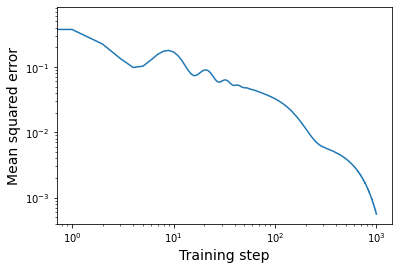

In [ ]:
# Now we use the keras functionality, built into the model, to fit using a mean squared error on the points
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
history = model.fit(x=samples[:, 0], y=samples[:, 1], epochs=1000, verbose=False)
plt.plot(history.history['loss'])
plt.xlabel('Training step', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)
plt.loglog()
plt.show()

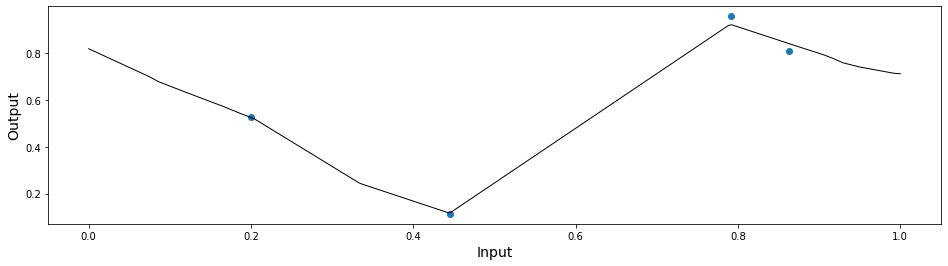

In [ ]:
# Did it work?
num_plot_pts = 256
input_vals = np.linspace(0, 1, num_plot_pts).reshape([-1, 1])
output_vals = model(input_vals)

plt.figure(figsize=(16, 4))
plt.scatter(samples[:, 0], samples[:, 1])
# plt.plot(input_vals, output_vals, 'ko', markersize=2, lw=1.5, ls='--')
plt.plot(input_vals, output_vals, 'k', lw=1.)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.show()

If it didn't fit very well, go back and try changing:

- the network width and depth
- 'tanh' activation instead of 'relu'
- the weight initialization stddev
- the number of training steps ('epochs')

Once these are good, try fitting 8, 16, or 32 (x,y) pairs.  It gets tricky for a network pretty quickly 

# The feature presentation: making pretty pictures of 2D->2D maps

Here we're going to make the input and output dimensions 2, and visualize how a square patch in the input gets distorted by the network

In the same way as before, each displayed point represents an input-output pair, and then
we build up a ton of them to get a sense of the function we've created

In [ ]:
def compute_adj_mat(pts):
  diff = pts[:, np.newaxis] - pts[np.newaxis]
  return np.linalg.norm(diff, ord=2, axis=-1)

In [ ]:
hidden_layer_sizes = [32, 32]
activation_fn = 'tanh'
kernel_mean = bias_mean = 0.05
kernel_std = bias_std = 0.4
input_dimension = output_dimension = 2

kernel_initializer = tf.keras.initializers.random_normal(mean=kernel_mean, stddev=kernel_std)
bias_initializer = tf.keras.initializers.random_normal(mean=bias_mean, stddev=bias_std)

layers = [tfkl.Input(input_dimension)]
for hidden_dimension in hidden_layer_sizes:
  layers += [tfkl.Dense(hidden_dimension, activation=activation_fn, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer)]
layers += [tfkl.Dense(output_dimension)]

rand_net = tf.keras.Sequential(layers)

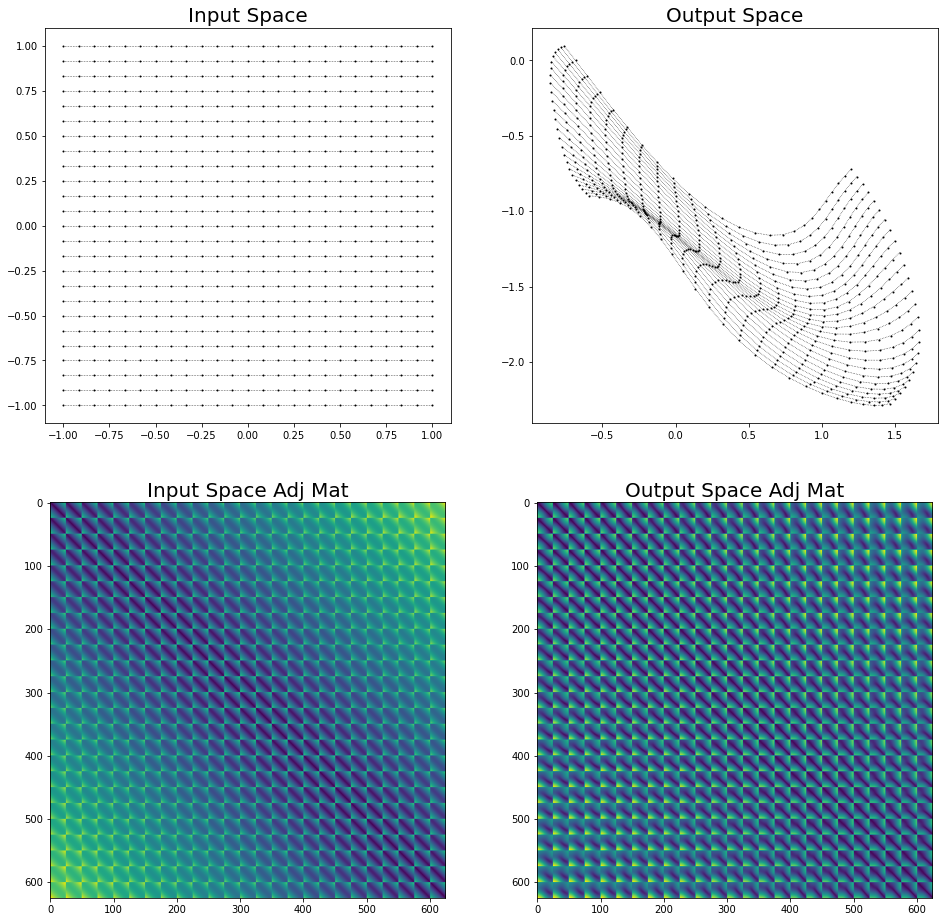

In [ ]:
# Make a grid of points to feed through the network
grid_side_length = 25
xxx, yyy = np.meshgrid(np.linspace(-1., 1., grid_side_length),
                       np.linspace(-1., 1., grid_side_length))
inp_pts = np.stack([xxx, yyy], axis=-1)

outp_pts = rand_net(inp_pts)

plt.figure(figsize=(16, 16))
plt.subplot(221)
# This will plot each row of points individually so that they will be connected
# by a connecting line, making the output easier to parse
[plt.plot(inp_pts[i, :, 0], inp_pts[i, :, 1], 'ko:', lw=0.6, markersize=1) for i in range(grid_side_length)]
plt.title('Input Space', fontsize=20)
plt.subplot(222)
[plt.plot(outp_pts[i, :, 0], outp_pts[i, :, 1], 'ko:', lw=0.6, markersize=1) for i in range(grid_side_length)]
plt.title('Output Space', fontsize=20)
plt.subplot(223)
plt.title('Input Space Adj Mat', fontsize=20)
plt.imshow(compute_adj_mat(np.reshape(inp_pts, [-1, 2])))
plt.subplot(224)
plt.title('Output Space Adj Mat', fontsize=20)
plt.imshow(compute_adj_mat(np.reshape(outp_pts, [-1, 2])))
plt.show()

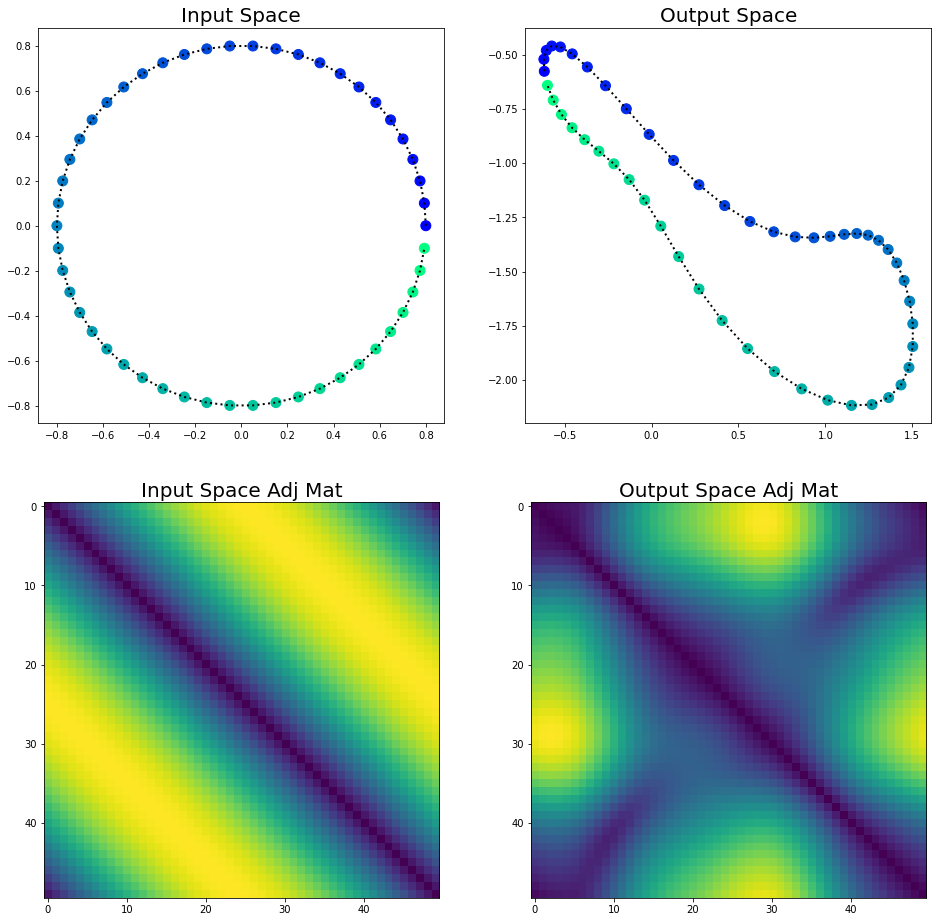

In [ ]:
# That adjacency matrix wasn't very interpretable due to the rows and columns, 
# so make a ring instead to feed through the network
num_ring_pts = 50
thetas = np.linspace(0, 2*np.pi, num_ring_pts, endpoint=False)
rad = 0.8
inp_circle = rad * np.stack([np.cos(thetas),
                             np.sin(thetas)], -1)
outp_circle = rand_net(inp_circle)

plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.plot(inp_circle[:, 0], inp_circle[:, 1], 'k:', lw=2)
plt.scatter(inp_circle[:, 0], inp_circle[:, 1], s=100, c=np.linspace(0, 1, num_ring_pts), cmap='winter')
plt.title('Input Space', fontsize=20)
plt.subplot(222)
plt.plot(outp_circle[:, 0], outp_circle[:, 1], 'k:', lw=2)
plt.scatter(outp_circle[:, 0], outp_circle[:, 1], s=100, c=np.linspace(0, 1, num_ring_pts), cmap='winter')
plt.title('Output Space', fontsize=20)
plt.subplot(223)
plt.title('Input Space Adj Mat', fontsize=20)
plt.imshow(compute_adj_mat(inp_circle))
plt.subplot(224)
plt.title('Output Space Adj Mat', fontsize=20)
plt.imshow(compute_adj_mat(outp_circle))
plt.show()

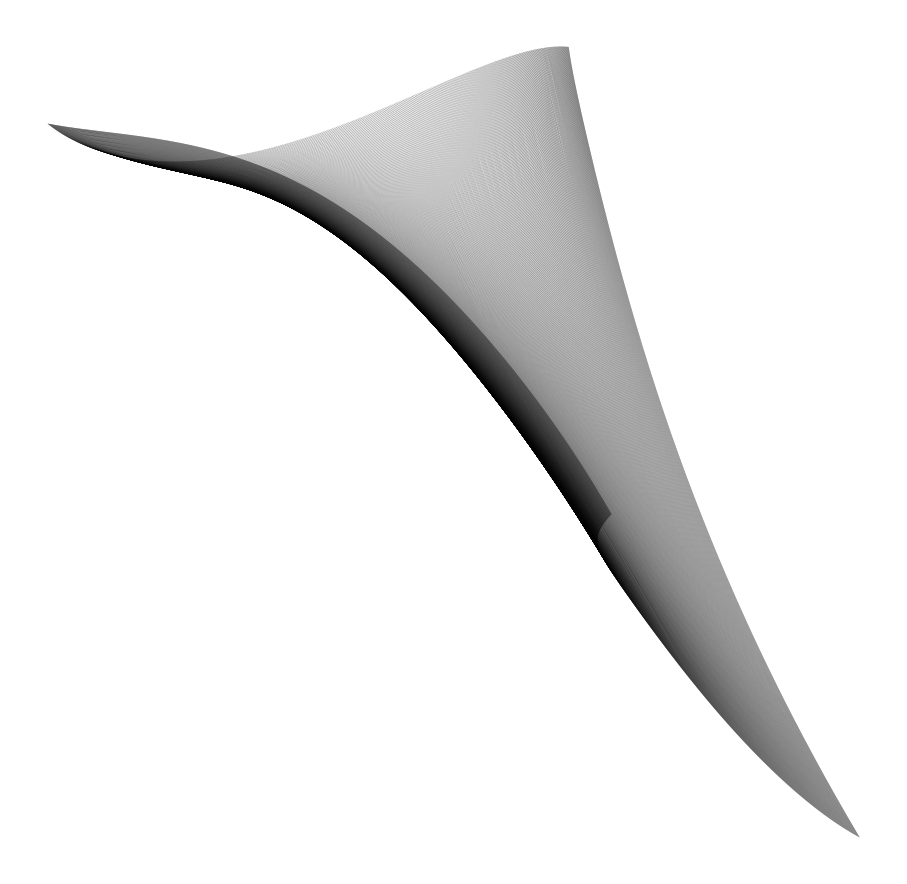

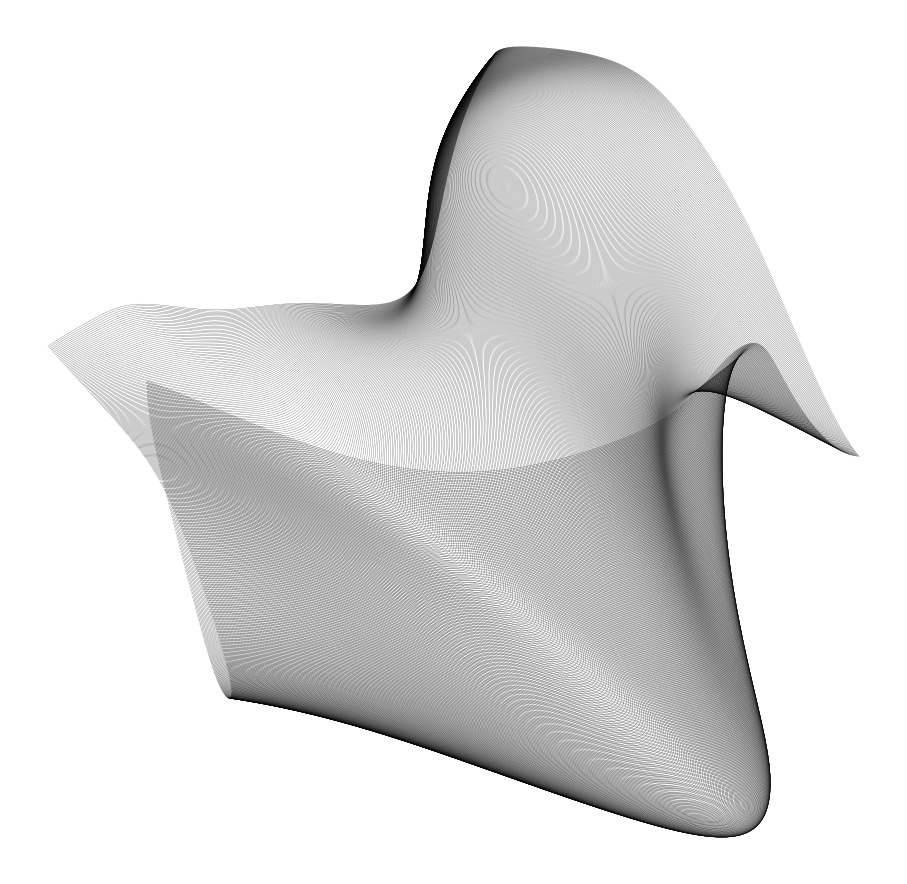

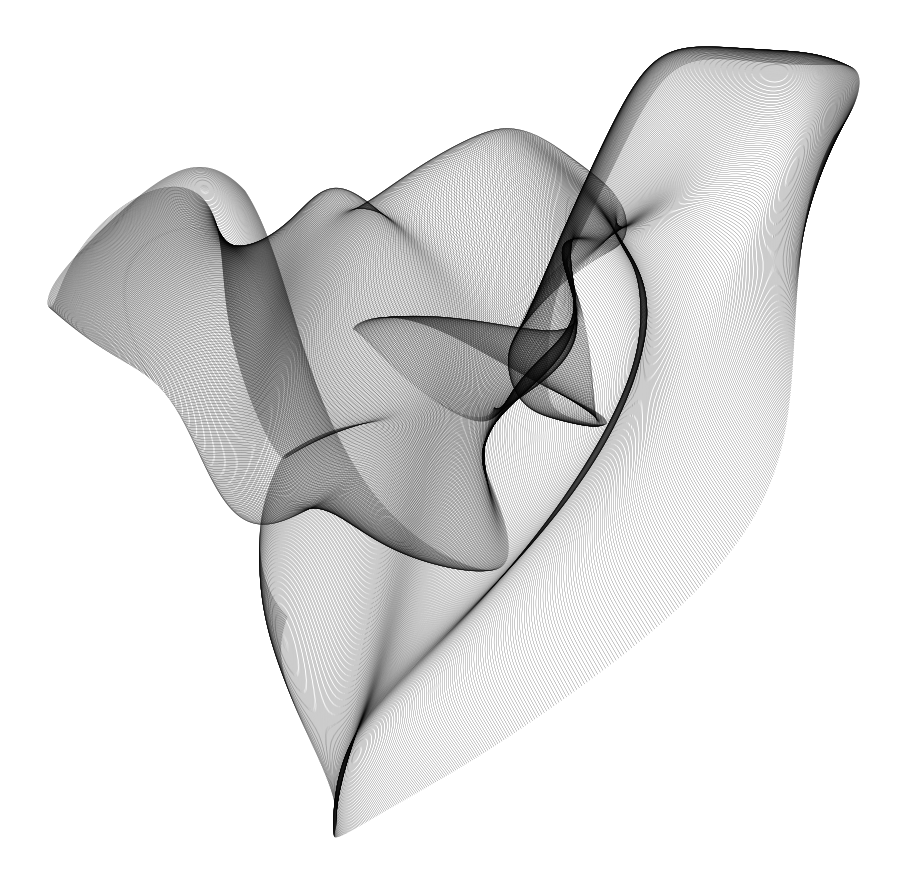

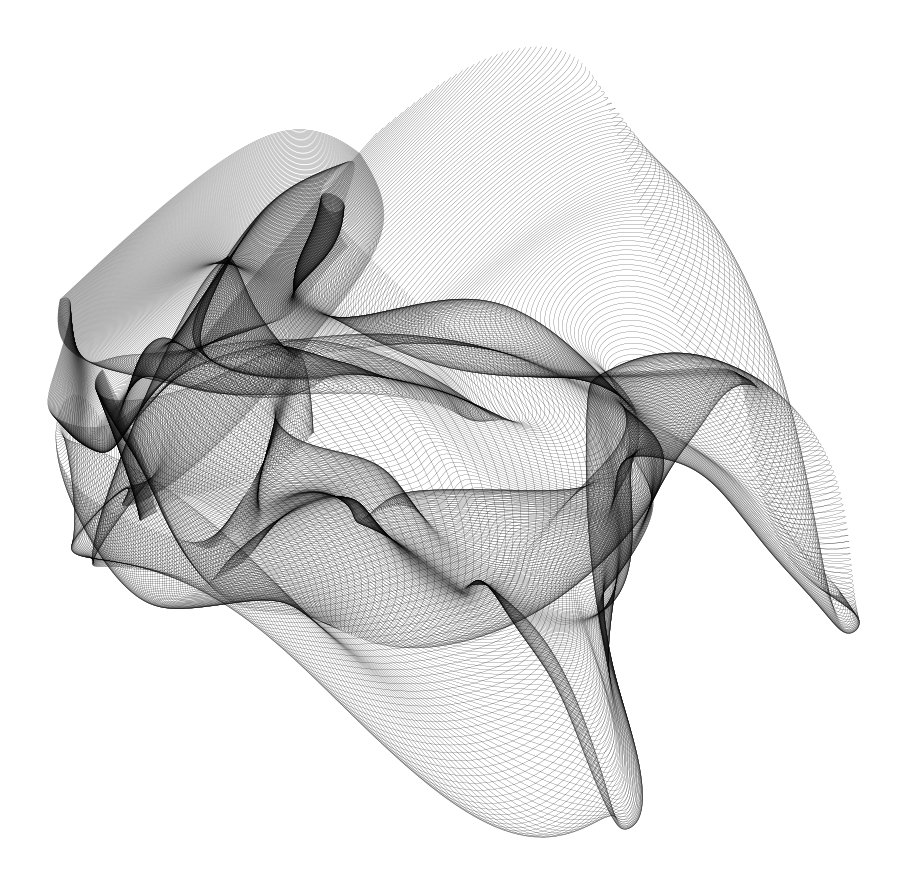

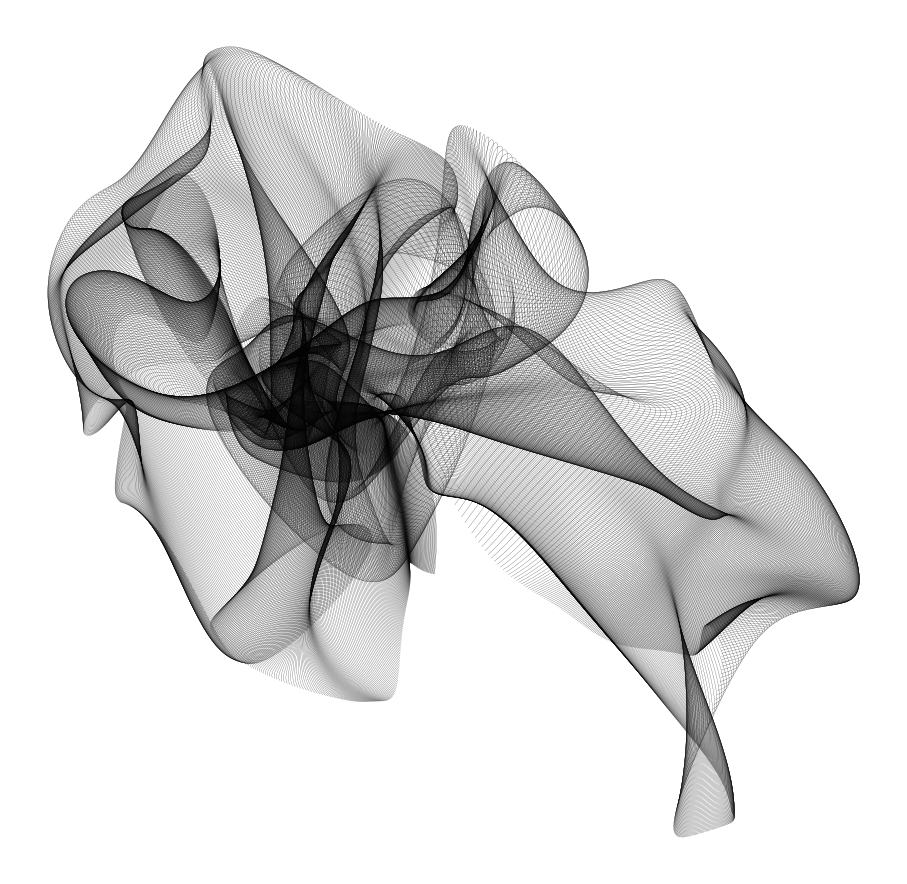

In [ ]:
# My favorite part: feed in many more points and visualize the 'curtains'
activation_fn = 'tanh'
weight_mean = bias_mean = 0.05
weight_std = bias_std = 0.5

grid_side_length = 600

weight_initializer = tf.keras.initializers.random_normal(mean=weight_mean, stddev=weight_std)
bias_initializer = tf.keras.initializers.random_normal(mean=bias_mean, stddev=bias_std)

xxx, yyy = np.meshgrid(np.linspace(-1., 1., grid_side_length),
                      np.linspace(-1., 1., grid_side_length))
inp_pts = np.stack([xxx, yyy], axis=-1)

for num_layers in range(1, 6):
  hidden_layer_sizes = [64]*num_layers

  layers = [tfkl.Input(input_dimension)]
  for hidden_dimension in hidden_layer_sizes:
    layers += [tfkl.Dense(hidden_dimension, activation=activation_fn, kernel_initializer=weight_initializer,
                          bias_initializer=bias_initializer)]
  layers += [tfkl.Dense(output_dimension)]
  rand_net = tf.keras.Sequential(layers)
  
  outp_pts = rand_net(inp_pts)
  plt.figure(figsize=(16, 16))
  _ = [plt.plot(outp_pts[i, :, 0], outp_pts[i, :, 1], 'k', lw=0.2) for i in range(grid_side_length)]
  plt.axis('off')
  plt.show()

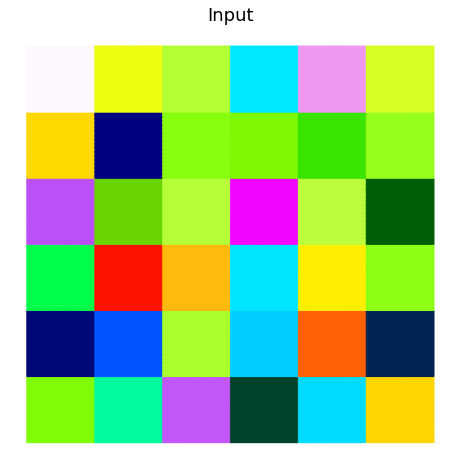

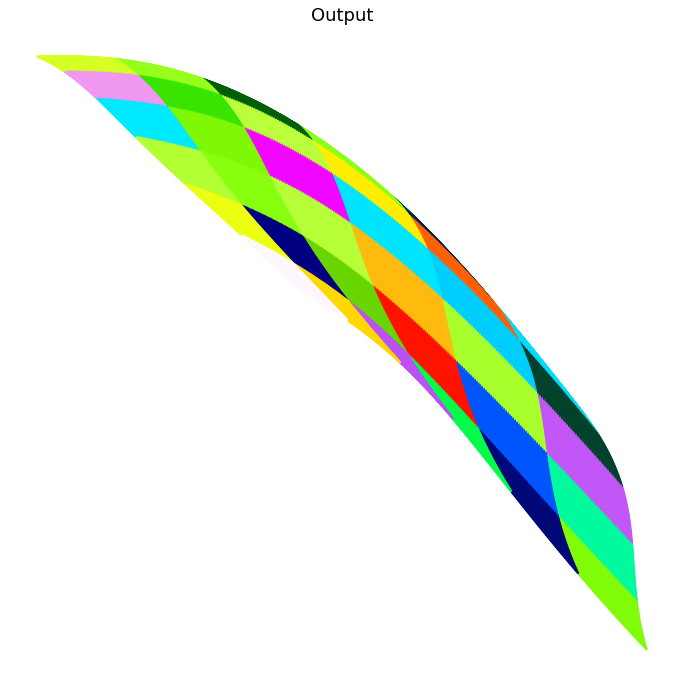

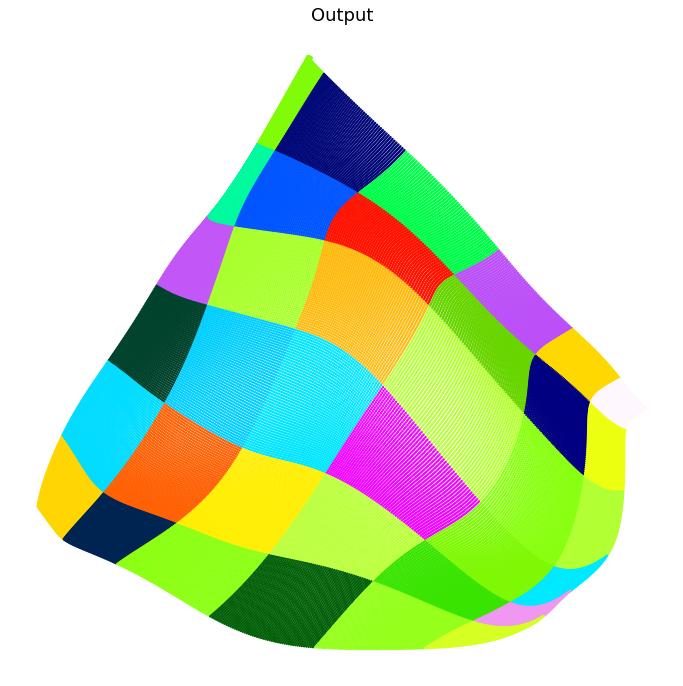

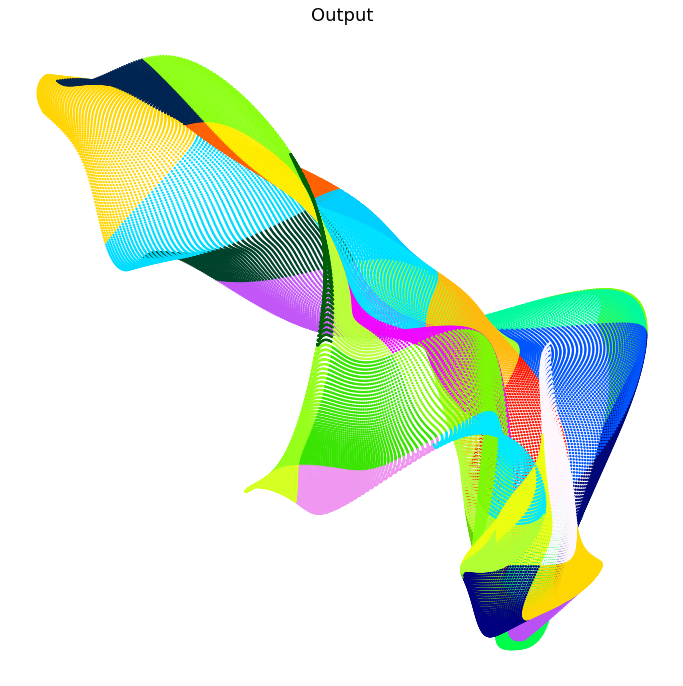

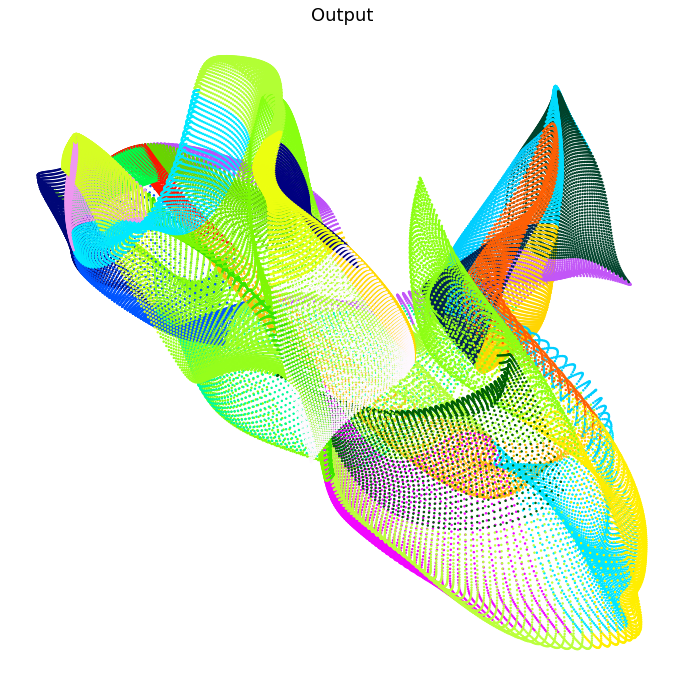

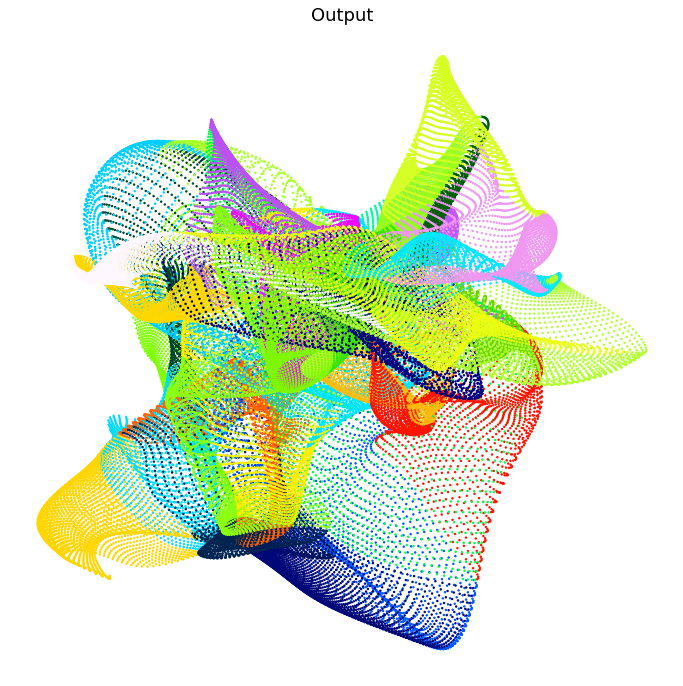

In [ ]:
# Do the same as above, but passing through a quilt of colorful patches instead of threads of a tapestry
grid_side_length = 300
num_squares_per_side = 6
color_map = 'gist_ncar'

activation_fn = 'tanh'
weight_mean = bias_mean = 0.05
weight_std = bias_std = 0.5

weight_initializer = tf.keras.initializers.random_normal(mean=weight_mean, stddev=weight_std)
bias_initializer = tf.keras.initializers.random_normal(mean=bias_mean, stddev=bias_std)

xxx, yyy = np.meshgrid(np.linspace(-1., 1., grid_side_length),
                      np.linspace(-1., 1., grid_side_length))

# Randomly color the patches of the input
color_floats = np.zeros_like(xxx)
chunk_side_length = grid_side_length//num_squares_per_side
for chunk_start_x in range(0, grid_side_length, chunk_side_length):
  for chunk_start_y in range(0, grid_side_length, chunk_side_length):
    color_floats[chunk_start_x:chunk_start_x+chunk_side_length,
                chunk_start_y:chunk_start_y+chunk_side_length
                ] = np.random.uniform()

xxx = np.reshape(xxx, [-1, 1])
yyy = np.reshape(yyy, [-1, 1])
color_floats = np.reshape(color_floats, [-1])
inp_pts = np.concatenate([xxx, yyy], axis=-1)

plt.figure(figsize=(8, 8))
plt.scatter(inp_pts[:, 0], inp_pts[:, 1], s=2, c=color_floats, cmap=color_map)
plt.title('Input', fontsize=18)
plt.axis('off')
plt.show()

for num_layers in range(1, 6):
  hidden_layer_sizes = [64]*num_layers

  layers = [tfkl.Input(input_dimension)]
  for hidden_dimension in hidden_layer_sizes:
    layers += [tfkl.Dense(hidden_dimension, activation=activation_fn, kernel_initializer=weight_initializer,
                          bias_initializer=bias_initializer)]
  layers += [tfkl.Dense(output_dimension)]

  rand_net = tf.keras.Sequential(layers)

  outp_pts = rand_net(inp_pts)
  plt.figure(figsize=(12, 12))
  plt.scatter(outp_pts[:, 0], outp_pts[:, 1], s=2, c=color_floats, cmap=color_map)
  plt.axis('off')
  plt.title('Output', fontsize=18)
  plt.show()

If this was too little to keep you busy for very long, perhaps try one of the following:

- What does the nonlinear activation change?  Try the pre-defined ones:
https://www.tensorflow.org/api_docs/python/tf/keras/activations 

- You can directly edit the weights of the network with model.set_weights(new_weights).  Is there a noticeable difference in the visualizations between the effect of perturbing the weights in early layers vs late ones?

- Can you find a scalar quantity that captures the changing nature of the outputs as more/wider hidden layers are added?  This area of research is focused on network expressivity (e.g. cool paper https://arxiv.org/abs/1606.05336), to tie network architecture with the space of functions it parameterizes

- Most of the visualizations require 1- or 2-dimensional input and output, but the adjacency matrix calculation works for arbitrary dimensionality.  Try increasing the dimensionality of the input and output and visualizing the adj mats

- Can you specify an arbitrary adjacency matrix for the ring of points above, and train a network whose output reproduces that adjacency matrix?

- Can you reimplement all of the above in jax?